In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

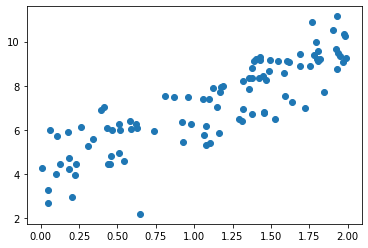

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
X_b[:5]

array([[1.        , 0.62506688],
       [1.        , 1.54459638],
       [1.        , 0.30518296],
       [1.        , 0.64695823],
       [1.        , 1.99249547]])

In [6]:
theta_best

array([[4.07093332],
       [2.80516415]])

In [7]:
# Make predict with theta best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.07093332],
       [9.68126163]])

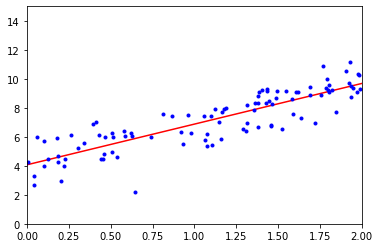

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent code using Scikit-Learn looks like this

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.07093332]), array([[2.80516415]]))

In [10]:
lin_reg.predict(X_new)

array([[4.07093332],
       [9.68126163]])

## **Gradient Descent**

## Batch Gradient Descent

In [11]:
learning_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2,1) # random initialization
for iteration in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate*gradient
theta

array([[4.07093332],
       [2.80516415]])

In [12]:
# Result 
X_new_b.dot(theta)

array([[4.07093332],
       [9.68126163]])

In [25]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

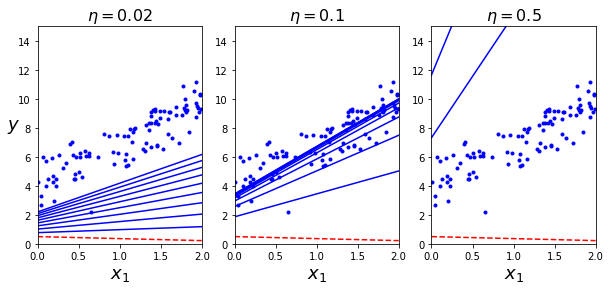

In [26]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

## Stochastic Gradient Descent

In [14]:
m=len(X_b)
theta_path_sgd =[]
np.random.seed(42)

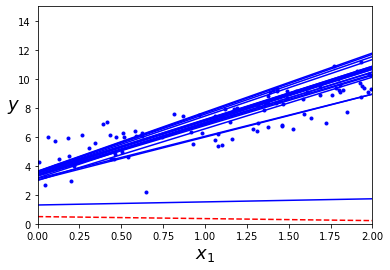

In [16]:
from matplotlib import style


n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X,y,"b. ")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show() 

In [17]:
theta

array([[4.04893809],
       [2.80847482]])

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06436481]), array([2.82203386]))

## Mini-batch Gradient Descent
>+ Tính gradient với 1 tập hợp nhỏ ngẫu nhiên ọgi là minibatch, Kết quả tốt hơn SGD nhưng vẫn có thể khó tránh khỏi local minimum

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[4.038623  ],
       [2.77252332]])

In [27]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

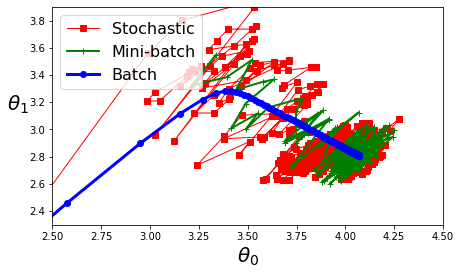

In [28]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

### **Polynomial Regression**

In [29]:
import numpy as np
import numpy.random as rnd 
np.random.seed(42)

In [31]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

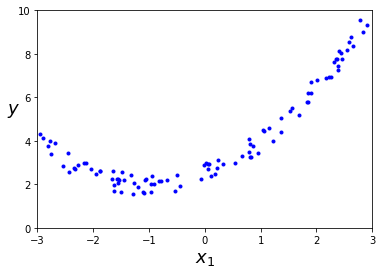

In [33]:
plt.plot(X,y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

>+ Một đường thăng sẽ không phù họp với dữ liệu này. Sử dụng lớp Scikit-Learn’s Poly nomialFeatures để biến đổi dữ liệu đào tạo, thêm bình phương (đa thức bậc 2) của mỗi đối tượng trong nhóm đào tạo làm các tính năng mới (new features)

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.81142489])

In [41]:
X_poly[0]

array([-2.81142489,  7.90410989])

In [42]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.50905558]), array([[0.97535385, 0.50268606]]))

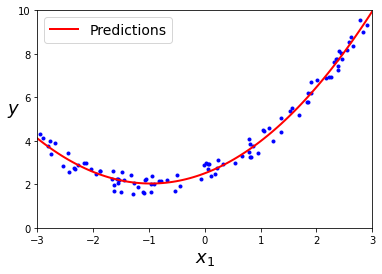

In [44]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

Điều gì xảy ra nếu chúng ta không dùng Polynomial Features để sử lí thêm tính năng mới ( hồi quy ở đây là đưong cong nên phải tạo features cho x^2)

In [45]:
m = 100
X_1 = 6 * np.random.rand(m,1) - 3
y_1 = 0.5 * X**2 + X + 2 + np.random.rand(m,1)

In [50]:
lin_reg_1 = LinearRegression()
lin_reg_1.fit(X_1, y_1)
lin_reg.intercept_, lin_reg.coef_
# y = 0.50268606*x^2 + 0.97535385*x + 2.50905558

(array([2.50905558]), array([[0.97535385, 0.50268606]]))

In [49]:
'''
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_new = lin_reg_1.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()
'''
# The ouput show : X has 2 features, but LinearRegression is expecting 1 features as input.

'\nX_new=np.linspace(-3, 3, 100).reshape(100, 1)\ny_new = lin_reg_1.predict(X_new_poly)\nplt.plot(X, y, "b.")\nplt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")\nplt.xlabel("$x_1$", fontsize=18)\nplt.ylabel("$y$", rotation=0, fontsize=18)\nplt.legend(loc="upper left", fontsize=14)\nplt.axis([-3, 3, 0, 10])\nplt.show()\n'

+ **Lưu ý rằng khi có nhiều đối tượng, Hồi quy đa thức có khả năng tìm mối quan hệ giữa các đối tượng (đây là điều mà một mô hình Hồi quy tuyến tính đơn thuần không thể làm được). Điều này có thể thực hiện được là do Tính năng đa thức cũng thêm tất cả các tổ hợp tính năng ở mức độ nhất định.**

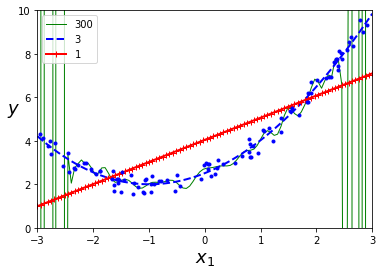

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 3), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()